# 第9章 EM算法及其推广

## 习题9.1

&emsp;&emsp;如例9.1的三硬币模型，假设观测数据不变，试选择不同的初值，例如，$\pi^{(0)}=0.46,p^{(0)}=0.55,q^{(0)}=0.67$，求模型参数为$\theta=(\pi,p,q)$的极大似然估计。  

**解答：**

**解答思路：**
1. 列出例9.1的三硬币模型；
2. 写出三硬币模型的EM算法；
3. 根据上述EM算法，编写代码，并求出模型参数的极大似然估计。

**解答步骤：**

**第1步：例9.1的三硬币模型**

&emsp;&emsp;根据书中第175页例9.1（三硬币模型）：
> &emsp;&emsp;假设有3枚硬币，分别记作A，B，C。这些硬币正面出现的概率分别是$\pi$，$p$和$q$。进行如下掷硬币试验：先掷硬币A，根据其结果选出硬币B或硬币C，正面选硬币B，反面选硬币C；然后掷选出的硬币，掷硬币的结果，出现正面记作1，出现方面记作0；独立地重复$n$次试验（这里，$n=10$），观测结果如下：
> $$
1,1,0,1,0,0,1,0,1,1
$$
> 假设只能观测到掷硬币的结果，不能观测掷硬币的过程。  
> 
> &emsp;&emsp;三硬币模型可以写作
> $$
\begin{aligned}
P(y|\theta) &= \sum_z P(y, z | \theta) = \sum_z P(z|\theta) P(y | z, \theta) \\
&= \pi p^y (1-p)^{1-y} + (1 - \pi) q^y (1- q)^{1-y}
\end{aligned}
$$
> 这里：
> 1. 随机变量$y$是观测变量，表示一次试验观测的结果是1或0；
> 2. 随机变量$z$是隐变量，表示未观测到的掷硬币A的结果；
> 3. $\theta=(\pi, p, q)$是模型参数。

**第2步：三硬币模型的EM算法**

&emsp;&emsp;根据书中第176页三硬币模型的EM算法：
> &emsp;&emsp;EM算法首先选取参数的初值，记作$\theta^{(0)}=(\pi^{(0)}, p^{(0)}, q^{(0)})$，然后通过下面的步骤迭代计算参数的估计值，直至收敛为止。第$i$次迭代参数的估计值为$\theta^{(i)}=(\pi^{(i)}, p^{(i)}, q^{(i)})$。EM算法的第$i+1$次迭代如下：
> 
> &emsp;&emsp;E步：计算在模型参数$\pi^{(i)}, p^{(i)}, q^{(i)}$下观测数据$y_j$来自掷硬币B的概率
> $$
\mu_j^{(i+1)} = \frac{\pi^{(i)} (p^{(i)})^{y_j} (1-p^{(i)})^{1-y_j}}{\pi^{(i)} (p^{(i)})^{y_j} (1-p^{(i)})^{1-y_j} + (1-\pi^{(i)}) (q^{(i)})^{y_j} (1-q^{(i)})^{1-y_j}}
$$
> &emsp;&emsp;M步：计算模型参数的新估计值
> $$
\pi^{(i+1)} = \frac{1}{n} \sum_{j=1}^N \mu_j^{(i+1)} \\
p^{(i+1)} = \frac{ \displaystyle \sum_{j=1}^n \mu_j^{(i+1)} y_j }{ \displaystyle \sum_{j=1}^n \mu_j^{(i+1)} } \\
q^{(i+1)} = \frac{ \displaystyle \sum_{j=1}^n ( 1 - \mu_j^{(i+1)} ) y_j }{ \displaystyle \sum_{j=1}^n ( 1 - \mu_j^{(i+1)} ) }
$$

**第3步：编写代码并求出模型参数的极大似然估计**

In [1]:
import math


class ThreeCoinEM:
    def __init__(self, prob, tol=1e-6, max_iter=1000):
        """
        初始化模型参数
        :param prob: 模型参数的初值
        :param tol: 收敛阈值
        :param max_iter: 最大迭代次数
        """
        self.prob_A, self.prob_B, self.prob_C = prob
        self.tol = tol
        self.max_iter = max_iter

    def calc_mu(self, j):
        """
        （E步）计算mu
        :param j: 观测数据y的第j个
        :return: 在模型参数下观测数据yj来自掷硬币B的概率
        """
        # 掷硬币A观测结果为正面
        pro_1 = self.prob_A * math.pow(self.prob_B, data[j]) * math.pow((1 - self.prob_B), 1 - data[j])
        # 掷硬币A观测结果为反面
        pro_2 = (1 - self.prob_A) * math.pow(self.prob_C, data[j]) * math.pow((1 - self.prob_C), 1 - data[j])
        return pro_1 / (pro_1 + pro_2)

    def fit(self, data):
        count = len(data)
        print("模型参数的初值：prob_A={}, prob_B={}, prob_C={}".format(self.prob_A, self.prob_B, self.prob_C))
        print("EM算法训练过程：")
        for i in range(self.max_iter):
            # （E步）得到在模型参数下观测数据yj来自掷硬币B的概率
            _mu = [self.calc_mu(j) for j in range(count)]
            # （M步）计算模型参数的新估计值
            prob_A = 1 / count * sum(_mu)
            prob_B = sum([_mu[k] * data[k] for k in range(count)]) \
                     / sum([_mu[k] for k in range(count)])
            prob_C = sum([(1 - _mu[k]) * data[k] for k in range(count)]) \
                     / sum([(1 - _mu[k]) for k in range(count)])
            print('第{}次：prob_A={:.4f}, prob_B={:.4f}, prob_C={:.4f}'.format(i + 1, prob_A, prob_B, prob_C))
            # 计算误差值
            error = abs(self.prob_A - prob_A) + abs(self.prob_B - prob_B) + abs(self.prob_C - prob_C)
            self.prob_A = prob_A
            self.prob_B = prob_B
            self.prob_C = prob_C
            # 判断是否收敛
            if error < self.tol:
                print("模型参数的极大似然估计：prob_A={:.4f}, prob_B={:.4f}, prob_C={:.4f}".format(self.prob_A, self.prob_B,
                                                                                       self.prob_C))
                break

In [2]:
# 加载数据
data = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
# 模型参数的初值
init_prob = [0.46, 0.55, 0.67]

# 三硬币模型的EM模型
em = ThreeCoinEM(prob=init_prob, tol=1e-5, max_iter=100)
# 模型训练
em.fit(data)

模型参数的初值：prob_A=0.46, prob_B=0.55, prob_C=0.67
EM算法训练过程：
第1次：prob_A=0.4619, prob_B=0.5346, prob_C=0.6561
第2次：prob_A=0.4619, prob_B=0.5346, prob_C=0.6561
模型参数的极大似然估计：prob_A=0.4619, prob_B=0.5346, prob_C=0.6561


&emsp;&emsp;可见通过两次迭代，模型参数已经收敛，三硬币正面出现的概率分别为0.4619，0.5346，0.6561

## 习题9.2
证明引理9.2。

**解答：**

**解答思路：**
1. 写出需要证明的引理9.2，；
2. 列出$F$函数定义
3. 根据引理9.1，进行公式推导；
4. 根据约束条件$\displaystyle \sum_z \tilde{P}_{\theta}(Z) = 1$，可证明引理9.2。

**解答步骤：**

**第1步：需要证明的引理9.2**

&emsp;&emsp;根据书中第188页引理9.2：
> 若$\tilde{P}_{\theta}(Z)=P(Z | Y, \theta)$，则
> $$
F(\tilde{P}, \theta)=\log P(Y|\theta)
$$

**第2步：$F$函数定义**

&emsp;&emsp;根据书中第187页$F$函数定义：
> &emsp;&emsp;假设隐变量数据$Z$的概率分布为$\tilde{P}(Z)$，定义分布$\tilde{P}$与参数$\theta$的函数$F(\tilde{P}, \theta)$如下：
> 
> $$
F(\tilde{P}, \theta) = E_{\tilde{P}}[\log P(Y, Z|\theta)] + H(\tilde{P})
$$
> 
> 称为$F$函数。式中$H(\tilde{P}) = - E_{\tilde{P}} \log \tilde{P}(Z)$是分布$\tilde{P}(Z)$的熵。

**第3步：引理9.1**

&emsp;&emsp;根据书中第187页引理9.1：
> 对于固定的$\theta$，存在唯一的分布$\tilde{P}_{\theta}$极大化$F(\tilde{P}, \theta)$，这时$\tilde{P}_{\theta}$由下式给出：
> $$
\tilde{P}_{\theta}(Z) = P(Z | Y, \theta)
$$
> 并且$\tilde{P}_{\theta}$随$\theta$连续变化。

$\begin{aligned}
\therefore F(\tilde{P}, \theta) 
&= E_{\tilde{P}}[\log P(Y, Z|\theta)] + H(\tilde{P}) \\
&= E_{\tilde{P}}[\log P(Y,Z|\theta)] -E_{\tilde{P}} \log \tilde{P}(Z) \quad （F函数定义：H(\tilde{P}) = - E_{\tilde{P}} \log \tilde{P}(Z)）\\
&= \sum_Z \log P(Y,Z|\theta) \tilde{P}_{\theta}(Z) - \sum_Z \log \tilde{P}(Z) \cdot \tilde{P}(Z) \\
&= \sum_Z \log P(Y,Z|\theta) P(Z|Y,\theta) -  \sum_Z \log P(Z|Y,\theta) \cdot P(Z|Y,\theta) \quad（引理9.1：\tilde{P}_{\theta}(Z) = P(Z | Y, \theta)）\\
&= \sum_Z P(Z|Y,\theta) \left[ \log P(Y,Z|\theta) - \log P(Z|Y,\theta) \right] \\
&= \sum_Z P(Z|Y,\theta) \log \frac{P(Y,Z|\theta)}{P(Z|Y,\theta)} \\
&= \sum_Z P(Z|Y,\theta) \log P(Y|\theta) \\
&= \log P(Y|\theta) \sum_Z P(Z|Y,\theta) 
\end{aligned}$  

**第4步：根据引理9.1，得证**

根据引理9.1，可知：$\displaystyle \sum_Z P(Z|Y, \theta) = \sum_Z \tilde{P}_{\theta}(Z) = 1$  

$\therefore F(\tilde{P}, \theta) = \log P(Y|\theta)$，引理9.2得证。

## 习题9.3
已知观测数据  
-67，-48，6，8，14，16，23，24，28，29，41，49，56，60，75  
试估计两个分量的高斯混合模型的5个参数。

**解答：**

In [5]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 初始化观测数据
data=np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75]).reshape(-1, 1)

# 聚类
gmmModel = GaussianMixture(n_components=2)
gmmModel.fit(data)
labels = gmmModel.predict(data)
print("labels =", labels)

labels = [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


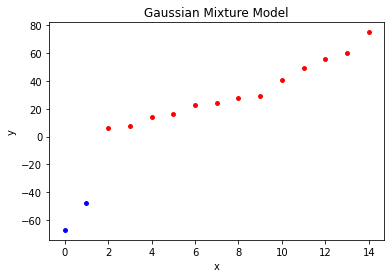

means = [[ 32.98489643 -57.51107027]]
covariances = [[429.45764867  90.24987882]]
weights =  [[0.86682762 0.13317238]]


In [6]:
for i in range(0,len(labels)):
    if labels[i] == 0:
        plt.scatter(i, data.take(i), s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("means =", gmmModel.means_.reshape(1, -1))
print("covariances =", gmmModel.covariances_.reshape(1, -1))
print("weights = ", gmmModel.weights_.reshape(1, -1))

## 习题9.4
&emsp;&emsp;EM算法可以用到朴素贝叶斯法的非监督学习，试写出其算法。

**解答：** 
> **EM算法的一般化：**  
**E步骤：**根据参数初始化或上一次迭代的模型参数来计算出隐变量的后验概率，其实就是隐变量的期望。作为隐变量的现估计值：$$w_j^{(i)}=Q_{i}(z^{(i)}=j) := p(z^{(i)}=j | x^{(i)} ; \theta)$$
**M步骤：**将似然函数最大化以获得新的参数值：$$
\theta :=\arg \max_{\theta} \sum_i \sum_{z^{(i)}} Q_i (z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)} ; \theta)}{Q_i (z^{(i)})}
$$  

使用NBMM（朴素贝叶斯的混合模型）中的$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数替换一般化的EM算法中的$\theta$参数，然后依次求解$w_j^{(i)}$与$\phi_z,\phi_{j|z^{(i)}=1},\phi_{j|z^{(i)}=0}$参数的更新问题。  
**NBMM的EM算法：**  
**E步骤：**  
$$w_j^{(i)}:=P\left(z^{(i)}=1 | x^{(i)} ; \phi_z, \phi_{j | z^{(i)}=1}, \phi_{j | z^{(i)}=0}\right)$$**M步骤：**$$
\phi_{j | z^{(i)}=1} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)} I(x_{j}^{(i)}=1)}{\displaystyle \sum_{i=1}^{m} w^{(i)}} \\ 
\phi_{j | z^{(i)}=0}:= \frac{\displaystyle  \sum_{i=1}^{m}\left(1-w^{(i)}\right) I(x_{j}^{(i)}=1)}{ \displaystyle \sum_{i=1}^{m}\left(1-w^{(i)}\right)} \\ 
\phi_{z^{(i)}} :=\frac{\displaystyle \sum_{i=1}^{m} w^{(i)}}{m} 
$$   